In [75]:

import glob
import os.path
import numpy as np
import mne
import matplotlib.pyplot as plt
import pandas as pd
import yasa

import dataset

plt.style.use('default')
plt.rc('font', family='Arial')
plt.rc('axes', unicode_minus=False)

mne.set_log_level('CRITICAL')

In [84]:
df_info = dataset.load_info()

In [85]:
df_spikes = pd.read_excel(os.path.join(dataset.path['results'], 'spike_detect.xlsx'), index_col=0)
df_sessions = pd.read_excel(os.path.join(dataset.path['results'], 'sessions.xlsx'), index_col=0)

In [86]:
animals = df_sessions['animal_id'].unique()

In [87]:
def hist_smooth_bin(timestamp, bin_width=10, window_step=5, max_len=None):
    if max_len is None:
        max_len = (timestamp.max() // bin_width) * (bin_width + 1)
        
    start = 0
    count = []
    start_points = []
    while start < max_len:
        end = start + bin_width
        count.append(((timestamp < end) & (timestamp >= start)).sum())
        start_points.append(start)
        start += window_step

    return np.array(count) / bin_width, np.array(start_points)

C:\Users\60978\AppData\Local\Temp\ipykernel_18368\925540847.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.17598343685300208' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_sessions.loc[df_sessions.query('animal_id == @animal and session == @session').index, 'spike_rate'] = spike_rate


Text(0.5, 0, 'Time (s)')

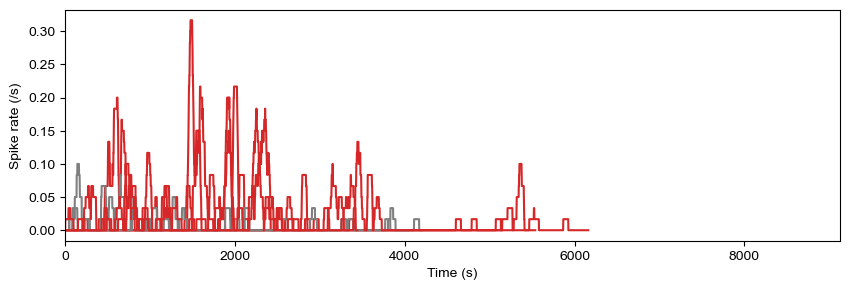

In [88]:
df_sessions.insert(df_sessions.shape[1], 'spike_rate', 0)

plt.figure(figsize=(10, 3))

for animal in animals:
    sessions = df_sessions.query('animal_id == @animal')['session'].unique()

    for session in sessions:
        
        df_spike_session = df_spikes.query('animal_id == @animal and session == @session')
        df_spike_session = df_spike_session.query('isi < 10 and isi > 0')
        df_spike_session = df_spike_session.reset_index(drop=True)

        if len(df_spike_session) == 0:
            spike_rate = 0
        else:
            session_length = df_spike_session['session_length'][0]
            bin_width = 60
            sr, bin_edges = hist_smooth_bin(df_spike_session['peak_onset'], bin_width=bin_width, window_step=2, max_len=session_length)
            if df_spike_session.loc[0, 'genotype'] == 'WT':
                color = 'tab:gray'
            else:
                color = 'tab:red'
            plt.plot(bin_edges, sr, color=color)

            spike_rate = df_spike_session.shape[0] / (sr > 0).sum()
            # spike_rate = df_spike_session.shape[0] / session_length

        df_sessions.loc[df_sessions.query('animal_id == @animal and session == @session').index, 'spike_rate'] = spike_rate

plt.xlim(0, df_sessions['session_length'].max())
plt.ylabel('Spike rate (/s)')
plt.xlabel('Time (s)')

In [89]:
df_sessions

,animal_id,genotype,session,session_length,spike_rate
0,0628#,WT,2024-03-14,2481.996,0.000000
1,0628#,WT,2024-04-07,4215.996,0.000000
2,0628#,WT,2024-05-27,7975.996,0.000000
3,0629#,Mutant,2024-03-09,2006.996,0.175983
4,0629#,Mutant,2024-03-29,3633.996,0.000000
5,0629#,Mutant,2024-04-22,3440.996,0.000000
6,0629#,Mutant,2024-05-15,7097.996,0.000000
7,0629#,Mutant,2024-05-29,5288.996,0.000000
8,0633#,WT,2024-03-09,2372.996,0.000000
9,0633#,WT,2024-03-28,3490.996,0.000000


Text(0, 0.5, 'Spike rate (/s)')

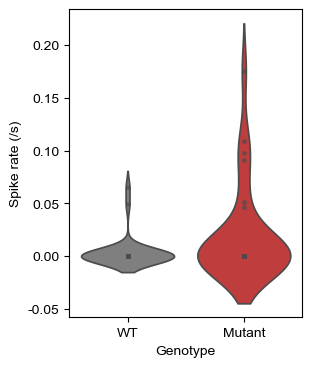

In [99]:
import seaborn as sns

plt.figure(figsize=(3, 4))
sns.violinplot(
    data=df_sessions,
    x='genotype',
    y='spike_rate',
    hue='genotype',
    hue_order=['WT', 'Mutant'],
    palette=['tab:gray', 'tab:red'],
    inner="point",
    inner_kws={'alpha':0.6}
)
plt.xlabel('Genotype')
plt.ylabel('Spike rate (/s)')

In [91]:
from scipy.stats import levene, ttest_ind, ranksums

group_A = df_sessions.loc[df_sessions['genotype'] == 'WT', 'spike_rate']
group_B = df_sessions.loc[df_sessions['genotype'] == 'Mutant', 'spike_rate']
# _, p_square = levene(group_A, group_B)
# _, p = ttest_ind(group_A, group_B, equal_var=p_square > 0.05)
stat, p = ranksums(group_A, group_B)
print(f'P value: {p:.2f}')

P value: 0.34
